In [1]:
import sys
sys.path.append('../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
# fs=20
# import ClassMSSFR
# from matplotlib.ticker import (FormatStrFormatter,
#                                AutoMinorLocator)

In [2]:

NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf

# NSNSrate1 = [250,2810] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
# BHBHrate1 = [9.7,101] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
# BHNSrate1 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 

BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf

ObservedRatesList = [BHBHratez0, BHNSrate0, NSNSrate0]

In [3]:
DCOtype='BHBH'
df_name = '../Data/'+DCOtype+'_intrinsic.csv'
Ncompare = 12
df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])


print(df.iloc[:,1::2])

FileNotFoundError: [Errno 2] File b'../Data/BHBH_intrinsic.csv' does not exist: b'../Data/BHBH_intrinsic.csv'

In [4]:
## Rates on 1 big axis

In [335]:

all_names = ['isolated binaries', 'CHE', 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC', 'primordial', 'triples']
colors = sns.color_palette("husl", len(all_names))   
name_colors = dict(zip(all_names, colors))


def plotDCOrates(axe, df_names, df_colordict, df_labels, DCOtype='BHNS'):
    

    
    ############## 2nd panel on the right ##########################
    ################################################################
    


    v_height=0
    for ind_file, csv_filename in enumerate(df_names):
        print(csv_filename)
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])

        df = df.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        for ind_n, name in enumerate(df.columns):
            
            
            
            rate = df[name]
            mask_notna = (df[name].notna())
            rate = rate[mask_notna]


            axe.scatter(rate,  v_height*np.ones_like(rate), s=105, c='gray', zorder=1)
            axe.errorbar(x=[np.min(rate),np.max(rate)], y=2*[v_height], yerr=2*[0.3], color=df_colordict[labelname], zorder=5, lw=5)


            # if plotting the first rate, add in text which type of formation channel we are plotting 
            if ind_n==(0): #len(df.columns)-1
                if (DCOtype=='BHBH') & (ind_file==0):
                    axe.text(2*1E-3, v_height, s=r'\textbf{%s}'%df_labels[ind_file] , rotation = 0, fontsize = fs+8, color=df_colordict[labelname], ha = 'left', va='top', weight = 'bold')
                
                else:
                    axe.text(8*1E3, v_height, s=r'\textbf{%s}'%df_labels[ind_file] , rotation = 0, fontsize = fs+8, color=df_colordict[labelname], ha = 'right', va='top', weight = 'bold')
                
            v_height+= -1  # height of rate to plot on vertical axes  

        if ind_file!=(len(df_names)-1):       
            axe.plot([1E-3, 1E4],  [v_height+0.5]*2, lw=2, c='gray', ls=':', zorder=1)
    
    
    return 



def make_up_axes(axe=None, DCOtype='BHNS',  df_names=['a', 'b']):

        
    # axes layout and mark up 
    axe.set_xscale('log')
    xlabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'$- $', fontsize=fs, setMinor=False)
    bps_names = []
   

    v_height=0
    yticks=[]    
    for ind_file, csv_filename in enumerate(df_names):
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])

        df = df.iloc[:,1::2]

        for ind_m, bps_model in enumerate(df.columns):
            bps_names.append(r'\textbf{%s}'%(bps_model) )
            
            yticks.append(v_height)
            v_height+=-1
    
    
    axe.set_yticks(yticks)
    axe.set_yticklabels(bps_names, rotation=0, fontsize=18)

    axe.set_xlim(1E-3, 1E4)
    axe.set_ylim(-len(bps_names),1)
    
    
    DCOtypeIndexDict = {'BHBH':0, 'BHNS':1, 'NSNS':2}
    ind_t=DCOtypeIndexDict[DCOtype]
    
    xx = np.linspace(-100, 100, 100)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
    if DCOtype in ['BHBH','NSNS', 'BHNS']:
        axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=2)


    elif DCOtype =='BHBH':
        # for BHBH rates also plot intrinsic z=0 estimated rates based on a redshift model
        min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
        max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
        axe.fill_betweenx(y=xx, x1=min_obs_rate2, x2=max_obs_rate2,  alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=0)
        axe.plot(min_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)
        axe.plot(max_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)

    # for BHNS plot that its a upper limit
    if DCOtype=='BHNS':
        axe.scatter(max_obs_rate, xx, marker=8, color=DCOtypeColorsDict[DCOtype], zorder=0, s=120)    

    
    
    
    

    
    
    ################################################################
    ################################################################
    ################################################################
    
    
    return 
    
    





def make_figure(DCOtype='BHNS'):
    
    
    ncols=1
    if DCOtype in ['BHBH']:
        names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv', '../Data/'+DCOtype+'_intrinsic_CHE.csv', '../Data/'+DCOtype+'_intrinsic_globular-clusters.csv',\
                  '../Data/'+DCOtype+'_intrinsic_nuclear-clusters.csv', '../Data/'+DCOtype+'_intrinsic_young-stellar-clusters.csv', '../Data/'+DCOtype+'_intrinsic_primordial.csv' ]
        rate_labels = ['isolated binaries', 'CHE', 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC', 'primordial']
        
       

        
    elif DCOtype=='BHNS':     
        names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv', '../Data/'+DCOtype+'_intrinsic_CHE.csv', '../Data/'+DCOtype+'_intrinsic_globular-clusters.csv',\
                  '../Data/'+DCOtype+'_intrinsic_young-stellar-clusters.csv','../Data/'+DCOtype+'_intrinsic_triples.csv'  ]
        rate_labels = ['isolated binaries', 'CHE', 'dynamical: GC',  'dynamical: YSC', 'triples']
        

    elif DCOtype=='NSNS':
        names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv',  '../Data/'+DCOtype+'_intrinsic_globular-clusters.csv',\
                   '../Data/'+DCOtype+'_intrinsic_young-stellar-clusters.csv' ]
        rate_labels = ['isolated binaries',  'dynamical: GC',   'dynamical: YSC']
        

        
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,25), gridspec_kw={"width_ratios":[1], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    
    
    
    axe.text(0.05, 0.81, s=text_DCO, rotation = 0, fontsize = fs+8, color =DCOtypeColorsDict[DCOtype], ha = 'left', va='top',\
             transform=axe.transAxes, weight = 'bold', bbox=textbox_props)   
        
        
    plotDCOrates(axe=axe, df_names=names, df_colordict=name_colors, df_labels=rate_labels, DCOtype=DCOtype)
    make_up_axes(axe, DCOtype, df_names=names)
    
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '_colors.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '_colors.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()    
    
    
    
    
    

../Data/BHBH_intrinsic_isolated-binary-evolution.csv
../Data/BHBH_intrinsic_CHE.csv
../Data/BHBH_intrinsic_globular-clusters.csv
../Data/BHBH_intrinsic_nuclear-clusters.csv
../Data/BHBH_intrinsic_young-stellar-clusters.csv
../Data/BHBH_intrinsic_primordial.csv


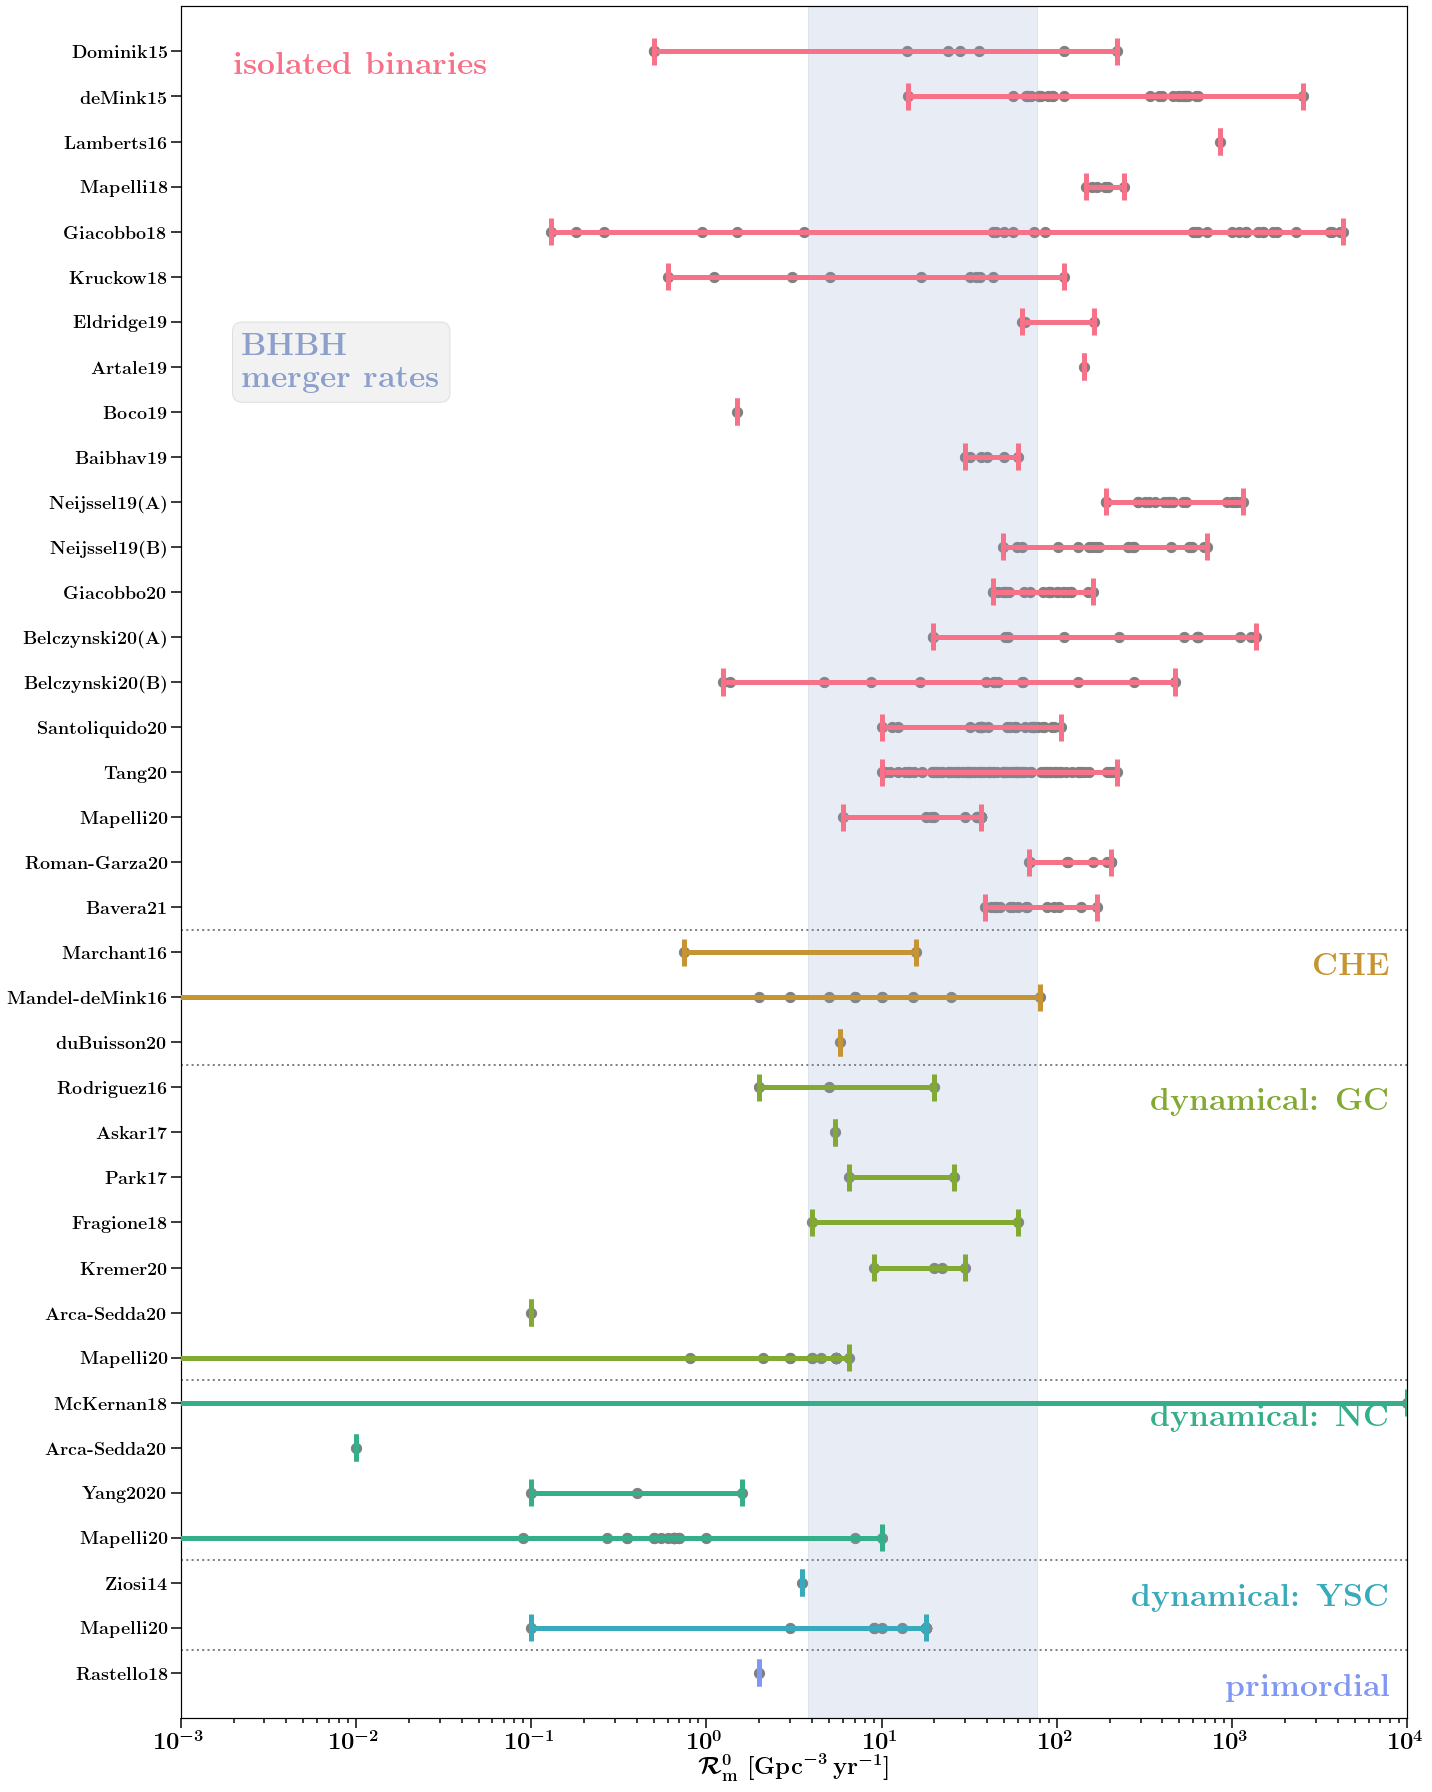

In [336]:
make_figure(DCOtype='BHBH')

../Data/BHNS_intrinsic_isolated-binary-evolution.csv
../Data/BHNS_intrinsic_CHE.csv
../Data/BHNS_intrinsic_globular-clusters.csv
../Data/BHNS_intrinsic_young-stellar-clusters.csv
../Data/BHNS_intrinsic_triples.csv


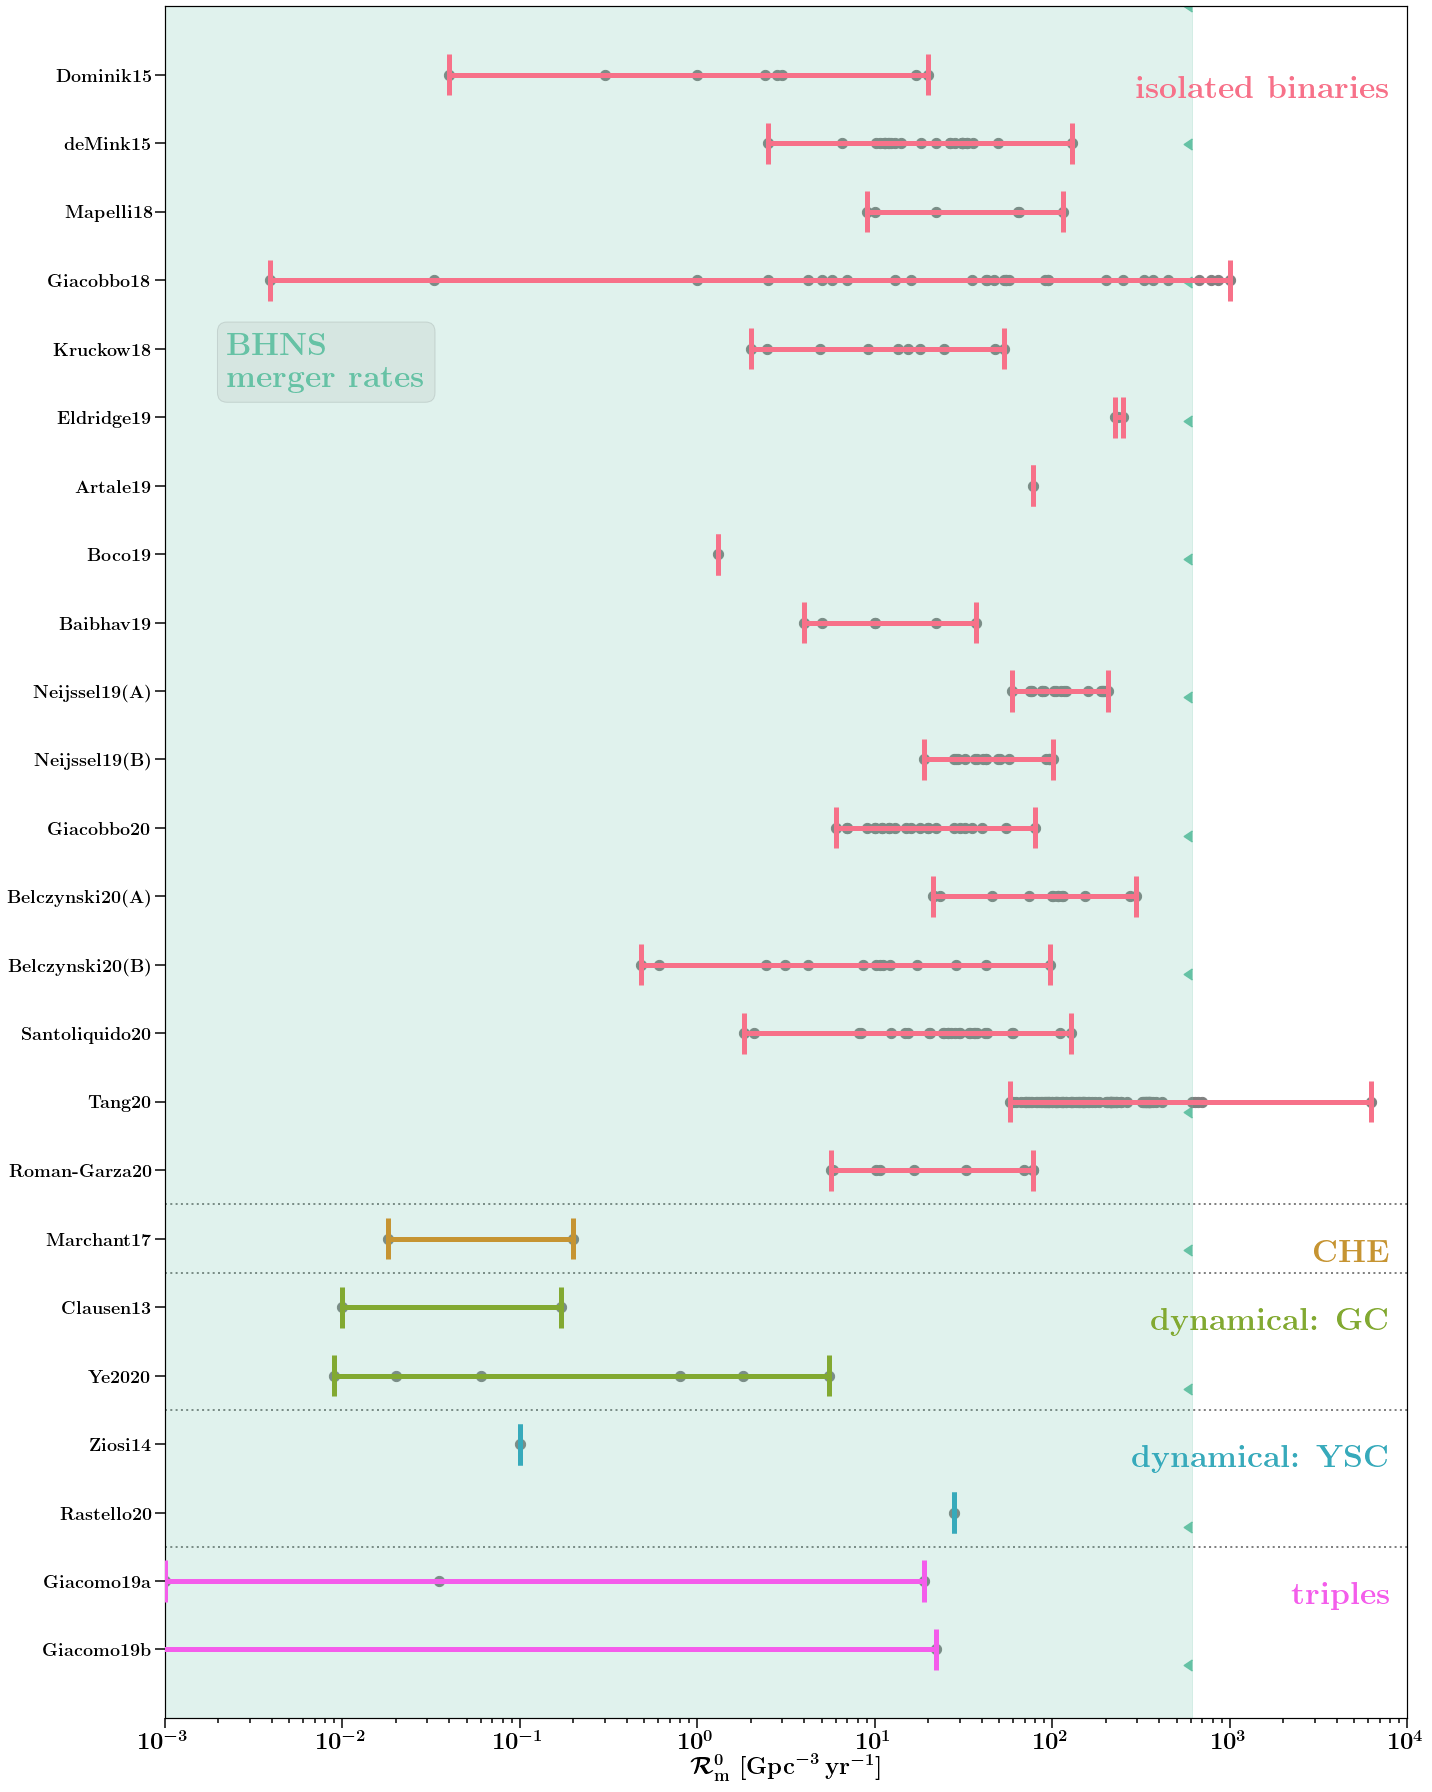

In [337]:
make_figure(DCOtype='BHNS')

../Data/NSNS_intrinsic_isolated-binary-evolution.csv
../Data/NSNS_intrinsic_globular-clusters.csv
../Data/NSNS_intrinsic_young-stellar-clusters.csv


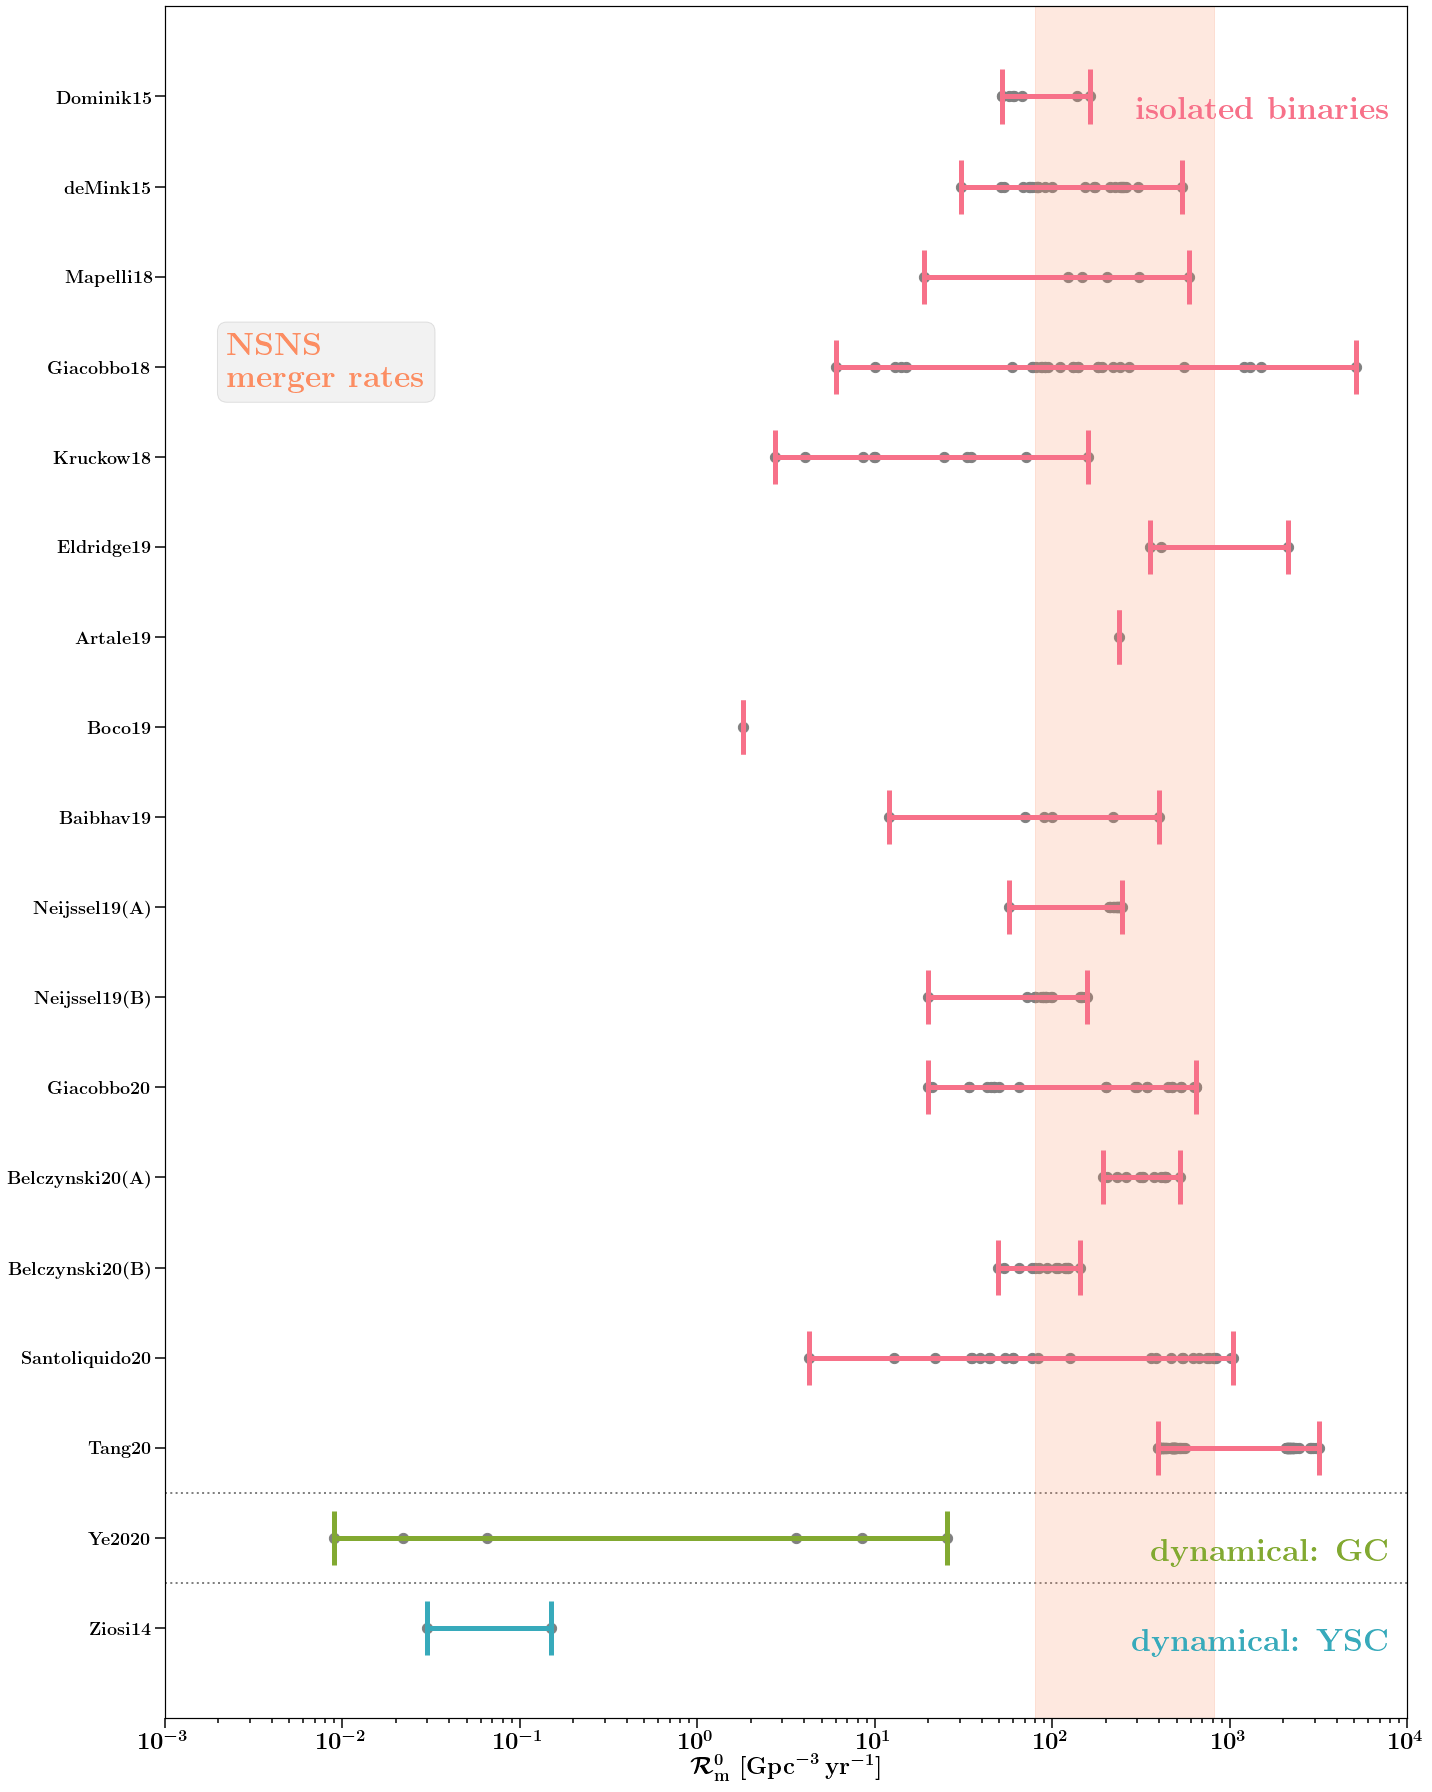

In [338]:
make_figure(DCOtype='NSNS')

In [272]:




def plotDCOrates(axe=None, df_name=None, DCOtype='BHNS'):
    

    
    ############## 2nd panel on the right ##########################
    ################################################################
    
#     nComparisons = 14
#     xx = np.asarray(range(nComparisons)) -1 
#     xmin, xmax = np.min(xx), np.max(xx) 
    
    
    # Number of studies we have available to compare with; 
    Ncompare = 12

    
    print(df_name)

    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])


    df = df.iloc[:,1::2]
    for ind_n, name in enumerate(df.columns):
        rate = df[name]
        mask_notna = (df[name].notna())
        rate = rate[mask_notna]
        colors = sns.color_palette("husl", len(rate))
        axe.scatter(rate,  ind_n*np.ones_like(rate), s=105, c='gray', zorder=10)
        

        
        axe.errorbar(x=[np.min(rate),np.max(rate)], y=2*[ind_n], yerr=2*[0.3], color='k', zorder=5, lw=5)

        

    ylim = len(df.columns)      


    return df



def make_up_axes(axe=None, DCOtype='BHNS', df='None'):

        
    # axes layout and mark up 
    axe.set_xscale('log')
    xlabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'$- $', fontsize=fs, setMinor=False)
    bps_names = []
    for ind_m, bps_model in enumerate(df.columns):
        bps_names.append(r'\textbf{%s}'%(bps_model) )
    axe.set_yticks(range(len(df.columns)))
    axe.set_yticklabels(bps_names, rotation=0, fontsize=18)

    axe.set_xlim(1E-3, 1E4)
    
    
    
    DCOtypeIndexDict = {'BHBH':0, 'BHNS':1, 'NSNS':2}
    ind_t=DCOtypeIndexDict[DCOtype]
    
    xx = np.linspace(-100, 100, 100)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
    if DCOtype in ['BHBH','NSNS', 'BHNS']:
        axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=2)


    elif DCOtype =='BHBH':
        # for BHBH rates also plot intrinsic z=0 estimated rates based on a redshift model
        min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
        max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
        axe.fill_betweenx(y=xx, x1=min_obs_rate2, x2=max_obs_rate2,  alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=0)
        axe.plot(min_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)
        axe.plot(max_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)

    # for BHNS plot that its a upper limit
    if DCOtype=='BHNS':
        axe.scatter(max_obs_rate, xx, marker=8, color=DCOtypeColorsDict[DCOtype], zorder=0, s=120)    

    
    axe.set_ylim(-1,len(df.columns))
    
    

    
    
    ################################################################
    ################################################################
    ################################################################
    
    
    return 
    
    





def make_figure(DCOtype='BHNS'):
    
    
    ncols=1
    if DCOtype in ['BHBH']:
        names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv', '../Data/'+DCOtype+'_intrinsic_CHE.csv', '../Data/'+DCOtype+'_intrinsic_globular-clusters.csv',\
                  '../Data/'+DCOtype+'_intrinsic_nuclear-clusters.csv', '../Data/'+DCOtype+'_intrinsic_young-stellar-clusters.csv', '../Data/'+DCOtype+'_intrinsic_primordial.csv' ]
        rate_labels = ['isolated binaries', 'CHE', 'Dynamical: GC', 'Dynamical: NC',  'Dynamical: YSC', 'primordial']
        
        nrows=len(rate_labels)
        height = [100]
        for i in range(nrows-1):
            height.append(25)
        f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,25), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":height})        

        
    elif DCOtype=='BHNS':     
        names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv', '../Data/'+DCOtype+'_intrinsic_CHE.csv', '../Data/'+DCOtype+'_intrinsic_globular-clusters.csv',\
                  '../Data/'+DCOtype+'_intrinsic_young-stellar-clusters.csv','../Data/'+DCOtype+'_intrinsic_triples.csv'  ]
        rate_labels = ['isolated binaries', 'CHE', 'Dynamical: GC',  'Dynamical: YSC', 'triples']
        
        nrows=len(rate_labels)
        height = [100]
        for i in range(nrows-1):
            height.append(25)
        f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,20), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":height}) 

    elif DCOtype=='NSNS':
        names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv',  '../Data/'+DCOtype+'_intrinsic_globular-clusters.csv',\
                   '../Data/'+DCOtype+'_intrinsic_young-stellar-clusters.csv' ]
        rate_labels = ['isolated binaries',  'Dynamical: GC',   'Dynamical: YSC']
        
        nrows=len(rate_labels)
        height = [100]
        for i in range(nrows-1):
            height.append(25)
        f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,20), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":height})   
    
    
    for ind_n, csv_filename in enumerate(names):
        df = plotDCOrates(axe[ind_n], csv_filename, DCOtype)
        
        
        
        axe[ind_n].text(0.05, 0.85, s=r'\textbf{%s}'%rate_labels[ind_n] , rotation = 0, fontsize = fs-2, color ='k', ha = 'left',transform=axe[ind_n].transAxes, weight = 'bold')
        if ind_n==0:
            axe[ind_n].text(0.05, 0.81, s=r'\textbf{%s}'%DCOtype , rotation = 0, fontsize = fs+8, color =DCOtypeColorsDict[DCOtype], ha = 'left', va='top',transform=axe[ind_n].transAxes, weight = 'bold')
    
    
        make_up_axes(axe[ind_n], DCOtype, df) 
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '_new.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '_new.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()    
    
    
    
    
    

../Data/BHBH_intrinsic_isolated-binary-evolution.csv
../Data/BHBH_intrinsic_CHE.csv
../Data/BHBH_intrinsic_globular-clusters.csv
../Data/BHBH_intrinsic_nuclear-clusters.csv
../Data/BHBH_intrinsic_young-stellar-clusters.csv
../Data/BHBH_intrinsic_primordial.csv


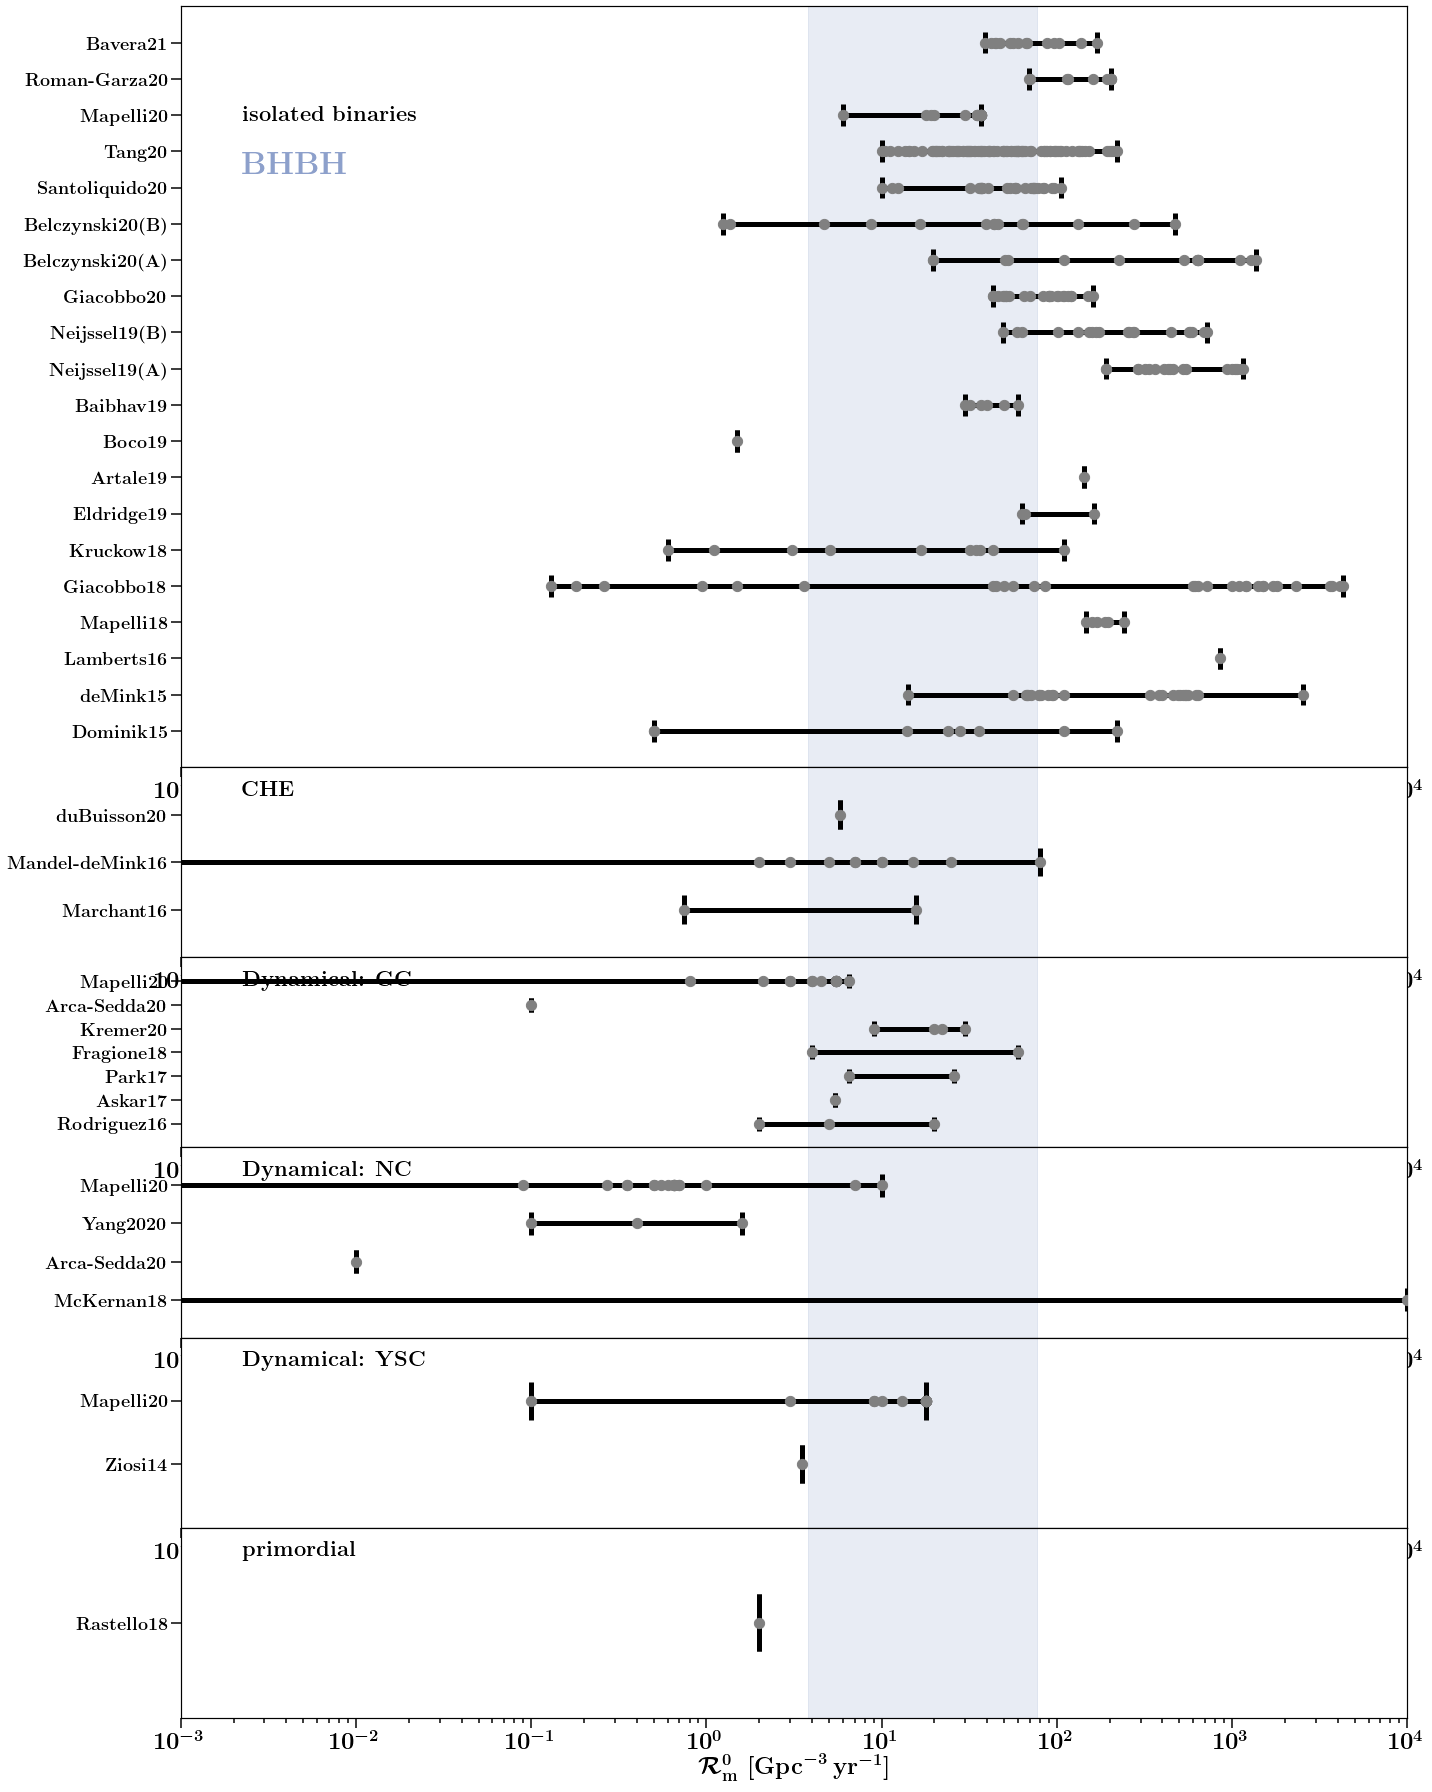

In [273]:

make_figure(DCOtype='BHBH')

../Data/BHNS_intrinsic_isolated-binary-evolution.csv
../Data/BHNS_intrinsic_CHE.csv
../Data/BHNS_intrinsic_globular-clusters.csv
../Data/BHNS_intrinsic_young-stellar-clusters.csv
../Data/BHNS_intrinsic_triples.csv


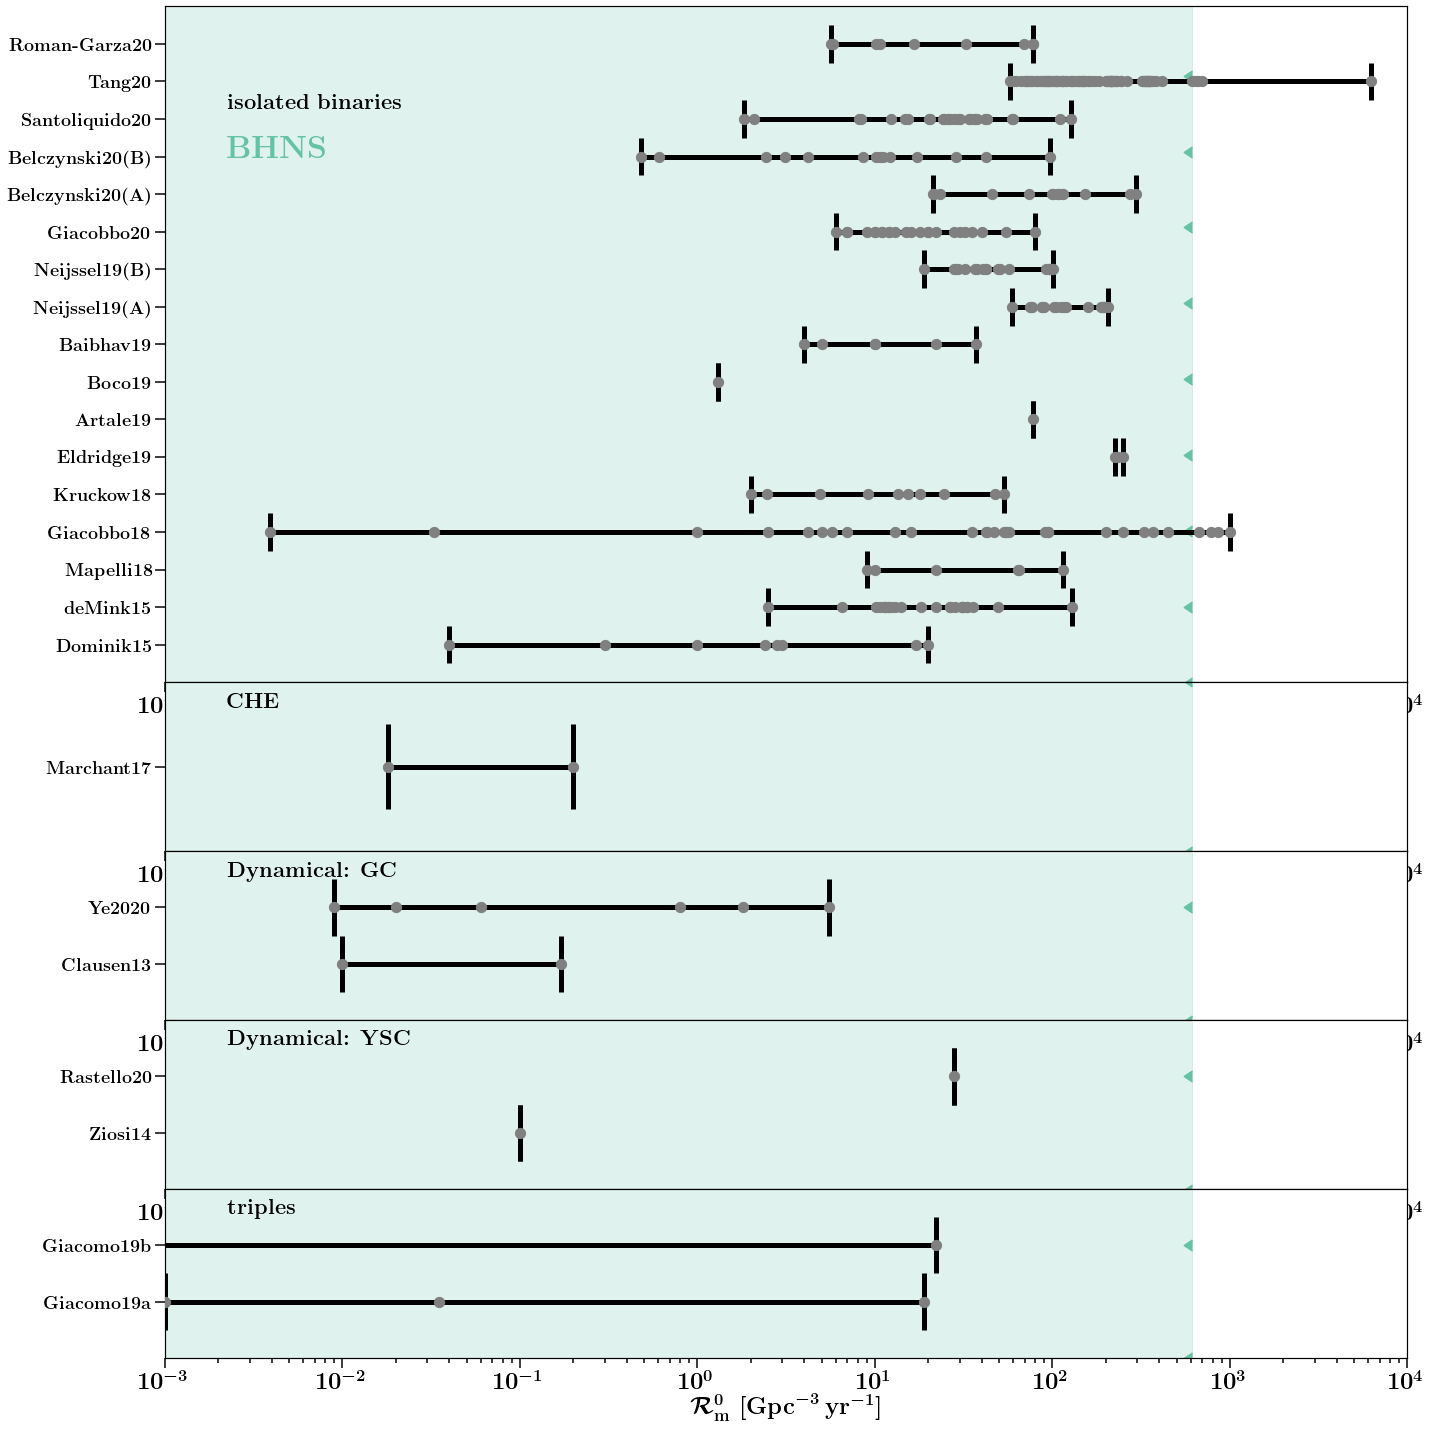

In [269]:


make_figure(DCOtype='BHNS')

../Data/NSNS_intrinsic_isolated-binary-evolution.csv
../Data/NSNS_intrinsic_globular-clusters.csv
../Data/NSNS_intrinsic_young-stellar-clusters.csv


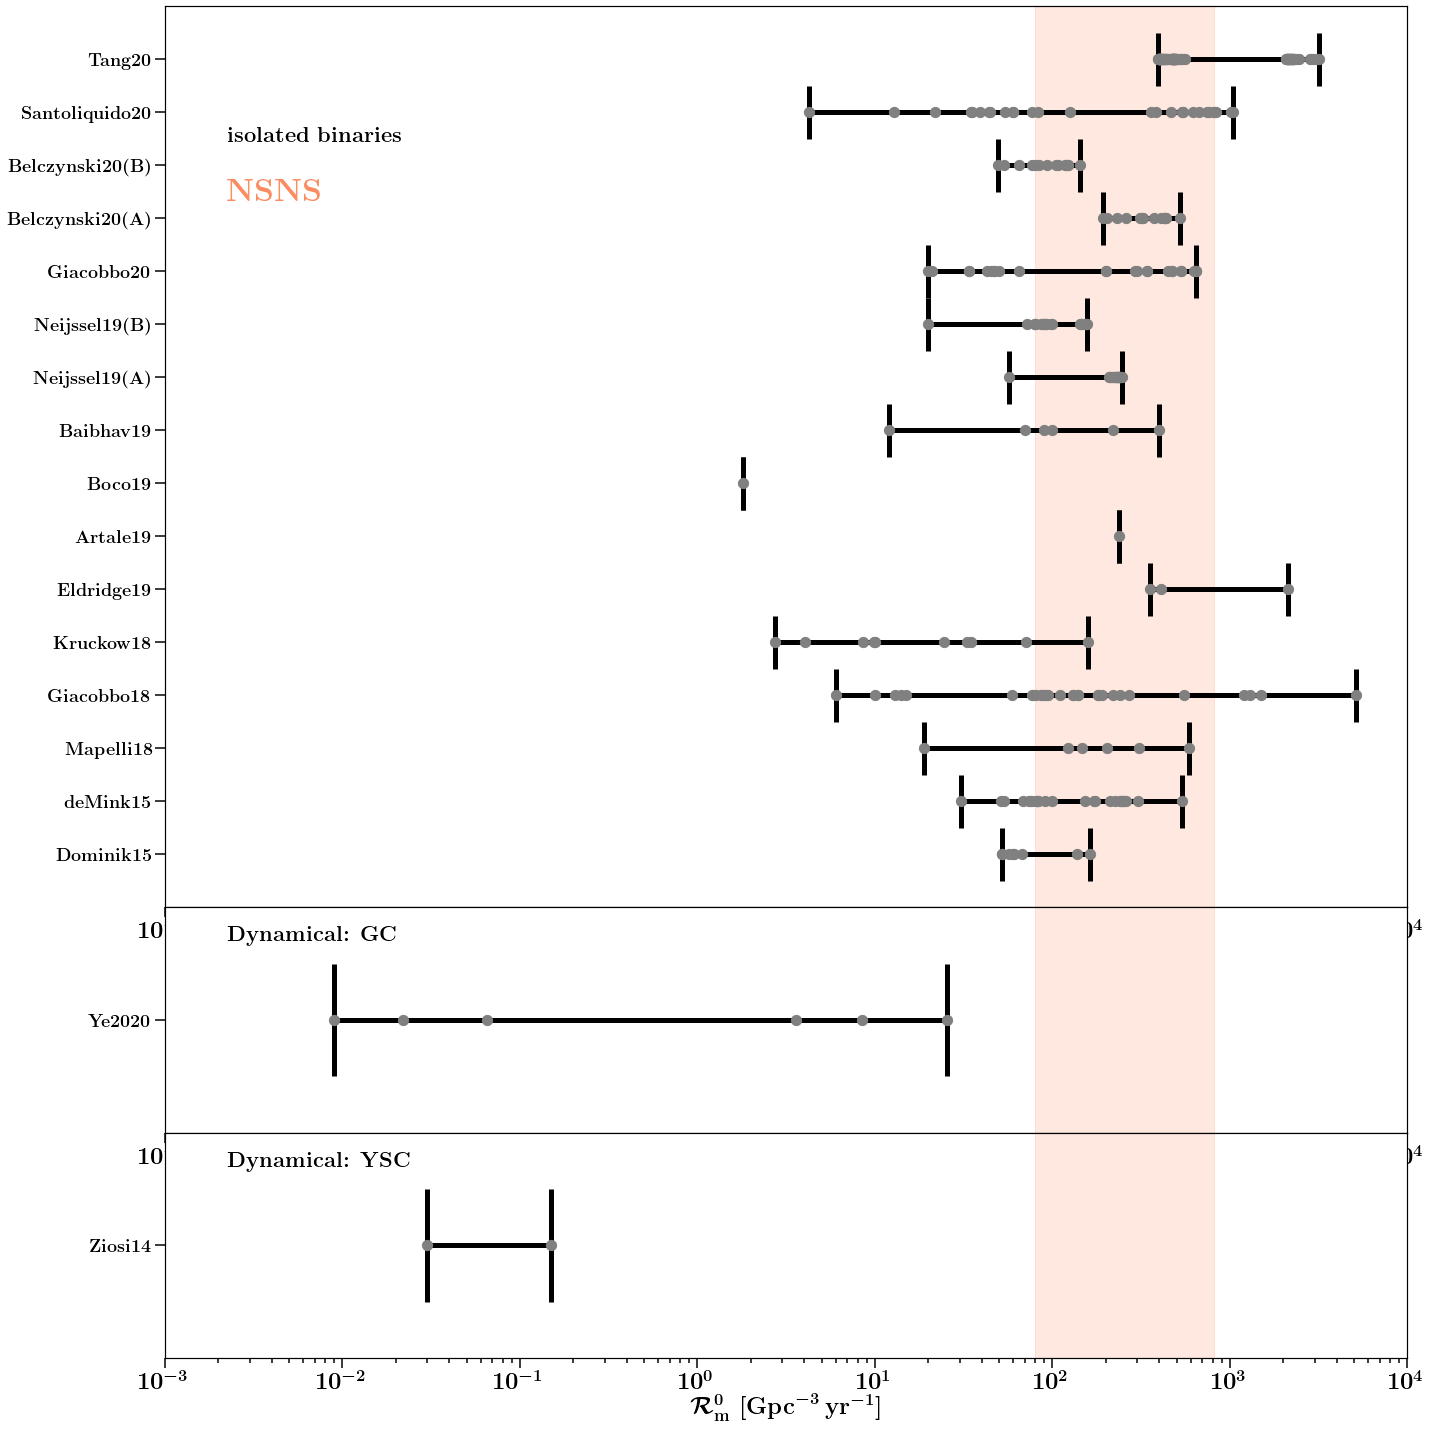

In [270]:


make_figure(DCOtype='NSNS')

In [5]:

# def make_up_axes(axe=None, DCOtype='BHNS', df='None'):

        
#     # axes layout and mark up 
#     axe.set_yscale('log')
#     axe.set_xscale('log')
#     ylabel = r'relative rates compared to $\alpha = 1$ rate'
#     xlabel = r'$\alpha$'
#     axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs, setMinor=False)
#     bps_names = []

#     axe.set_ylim(0.1, 10)
#     axe.set_xlim(0.05, 50)
    
#     axe.plot([0.05,50], [1,1],  c='k', linestyle=':', lw=3., alpha=0.5)   
#     axe.plot([1,1], [0.01, 100],  c='k', linestyle=':', lw=3., alpha=0.5)  
#     axe.fill_between(x=[0.05,50], y1=[0.5, 0.5], y2=[2,2],  alpha=0.3, color='gray', zorder=0)
#     axe.fill_between(x=[0.05,50], y1=[0.2, 0.2], y2=[5,5],  alpha=0.1, color='gray', zorder=0)

    
    
#     return 

markershapes = ["o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P"]

def make_up_axes(axe=None, DCOtype='BHNS', df='None'):

        
    # axes layout and mark up 
    axe.set_yscale('log')
    axe.set_xscale('log')
    ylabel = r'relative rates compared to $\alpha = 1$ rate'
    xlabel = r'$\alpha$'
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs, setMinor=False)
    bps_names = []

    axe.set_ylim(0.01, 100)
    axe.set_xlim(0.05, 20)
    
    # plot alpha = 1 rate fixed to 1 line
    axe.plot([0.05,50], [1,1],  c='k', linestyle=':', lw=3., alpha=0.5)   
    axe.text(0.052, 1, s=r'$\mathcal{R}(\alpha=1) =1$, \textbf{fixed}', rotation = 0, fontsize = fs-4, color='k', ha = 'left', va='bottom')
    # plot alpha = 1 line
    axe.plot([1,1], [0.01, 100],  c='k', linestyle=':', lw=3., alpha=0.5)  
    axe.text(1, 80, s=r'$\alpha=1$', rotation = 90, fontsize = fs-4, color='k', ha = 'right', va='top')
    
    axe.fill_between(x=[0.05,50], y1=[0.5, 0.5], y2=[2,2],  alpha=0.3, color='gray', zorder=0)
    axe.text(19.8, 0.9*2, s=r'change $<2\times$', rotation=0, fontsize = fs-6, color='k', ha = 'right', va='top')
    axe.fill_between(x=[0.05,50], y1=[0.2, 0.2], y2=[5,5],  alpha=0.1, color='gray', zorder=0)
    axe.text(19.8, 0.9*5, s=r'change $<5\times$', rotation=0, fontsize = fs-6, color='k', ha = 'right', va='top')
    axe.fill_between(x=[0.05,50], y1=[0.1, 0.1], y2=[10,10],  alpha=0.1, color='gray', zorder=0)
    axe.text(19.8, 0.9*10, s=r'change $<10\times$', rotation=0, fontsize = fs-6, color='k', ha = 'right', va='top')
    
    
    
    # arrows 
    axe.text(1*1.2, 0.012, s=r'larger $\alpha \rightarrow$', rotation=0, fontsize = fs-2, color='k', ha = 'left', va='bottom')
    
    axe.text(1/1.2, 0.012, s=r'$\leftarrow$ smaller $\alpha $', rotation=0, fontsize = fs-2, color='k', ha = 'right', va='bottom')
    return 

def make_alpha_plot(DCOtype='BHBH'):
    
    names =   ['../Data/'+DCOtype+'_intrinsic_isolated-trends-alpha.csv' ]
    rate_labels = ['isolated binaries']







    df_name = names[0]




    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])
    # column_names = df_col.columns
    # print(column_names)

    df_alpha = df.iloc[:,2::2]
    df_rates = df.iloc[:,1::2]
    rates_columns = df_rates.columns


    ncols, nrows=1,1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(16,10), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":[1]}) 

    colors = sns.color_palette("husl", len(df_alpha.columns))

    for ind_n, name in enumerate(df_alpha.columns):
        values = df_alpha[name]
        rates  = df_rates[rates_columns[ind_n]]
    #     print(values)

        mask_notna = (df_alpha[name].notna())
        alphas = values[mask_notna]    
        rates = rates[mask_notna]

        # in order of alphas 
        sort_index = np.argsort(alphas)
        ordered_alphas = alphas[sort_index]
        ordered_rates  =  rates[sort_index]

        marker_ind = ind_n%15
        
        if len(values)>0:

            axe.scatter(alphas[0],  rates[0]/rates[0], s=1005, c=[colors[ind_n]], zorder=10, marker='*')
            axe.plot(ordered_alphas, ordered_rates/rates[0], c=colors[ind_n], lw=3.3, zorder=1, label=name)
            axe.scatter(ordered_alphas, ordered_rates/rates[0], c='k', s=70, zorder=2, marker=markershapes[marker_ind])



    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)



    axe.text(0.05, 0.91, s=text_DCO, rotation = 0, fontsize = fs+8, color =DCOtypeColorsDict[DCOtype], ha = 'left', va='top',\
             transform=axe.transAxes, weight = 'bold', bbox=textbox_props)  


    make_up_axes(axe=axe, DCOtype=DCOtype, df='None')

    lgd = f.legend(fontsize=fs-6, ncol=4,\
                         bbox_to_anchor=(.95, 1.27)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  


    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '_alpha.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '_alpha.pdf',  bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()          



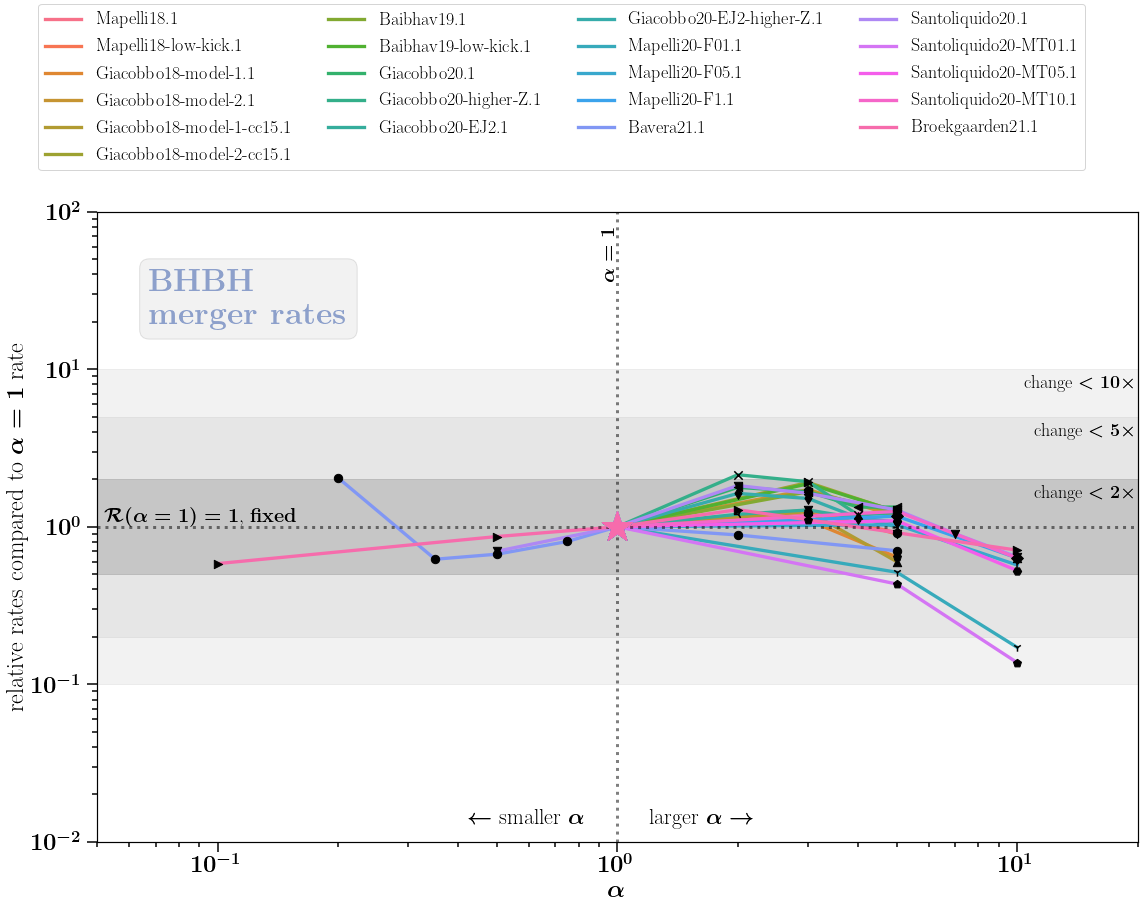

In [6]:
make_alpha_plot(DCOtype='BHBH')

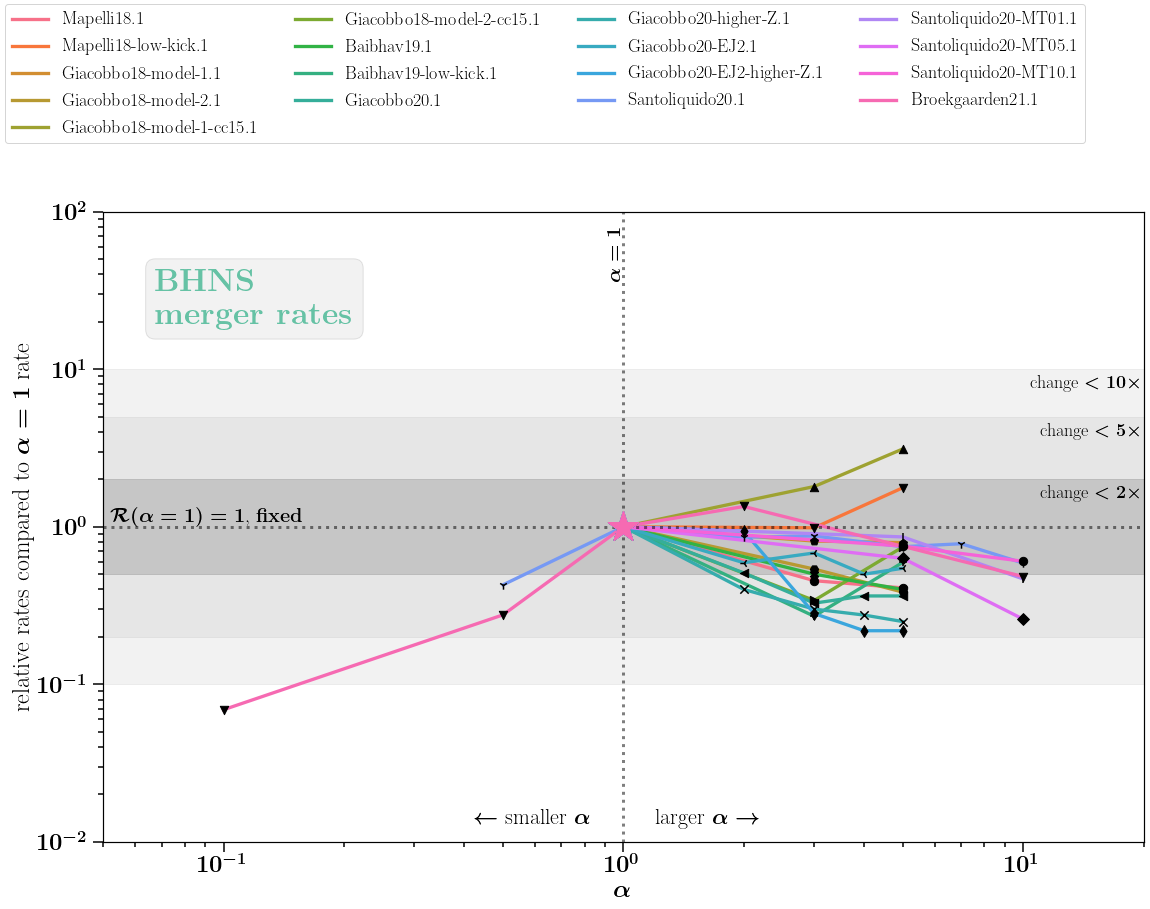

In [7]:
make_alpha_plot(DCOtype='BHNS')

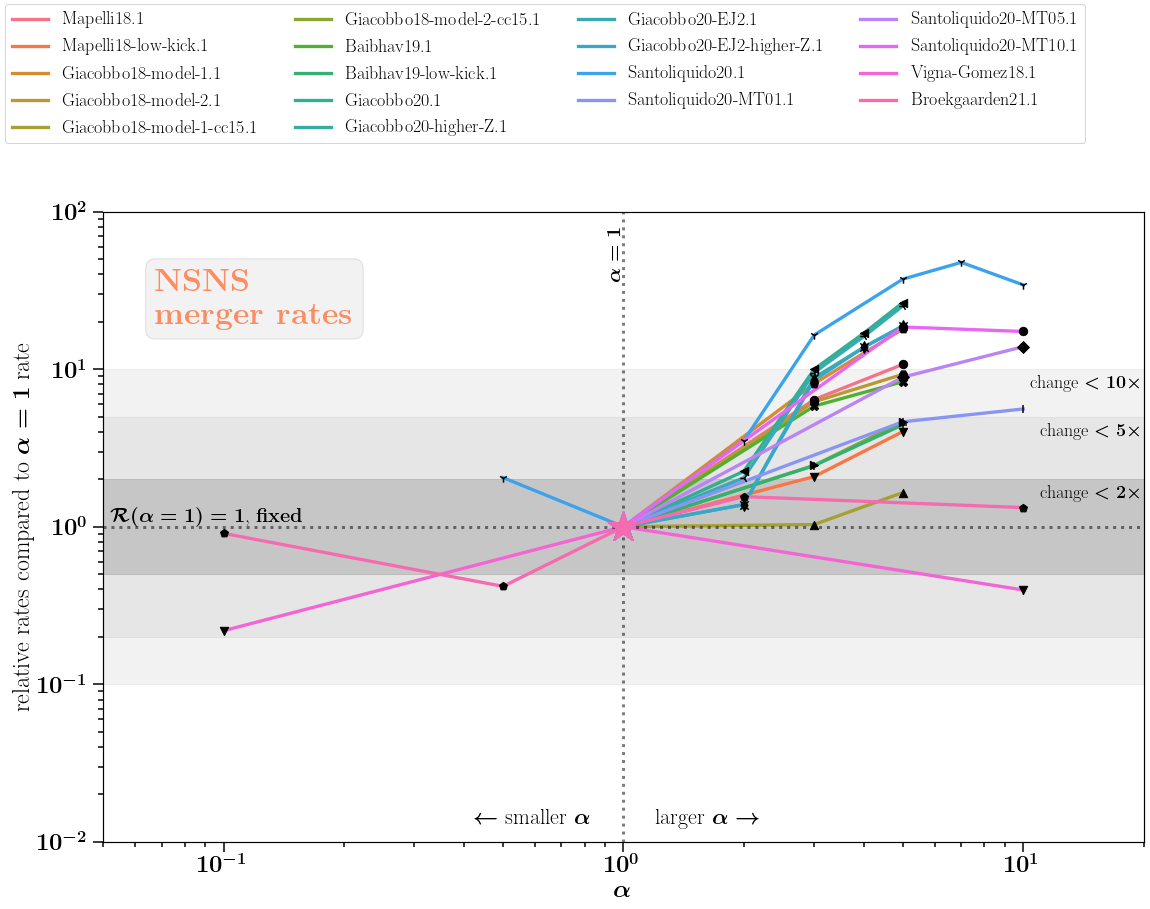

In [8]:
make_alpha_plot(DCOtype='NSNS')

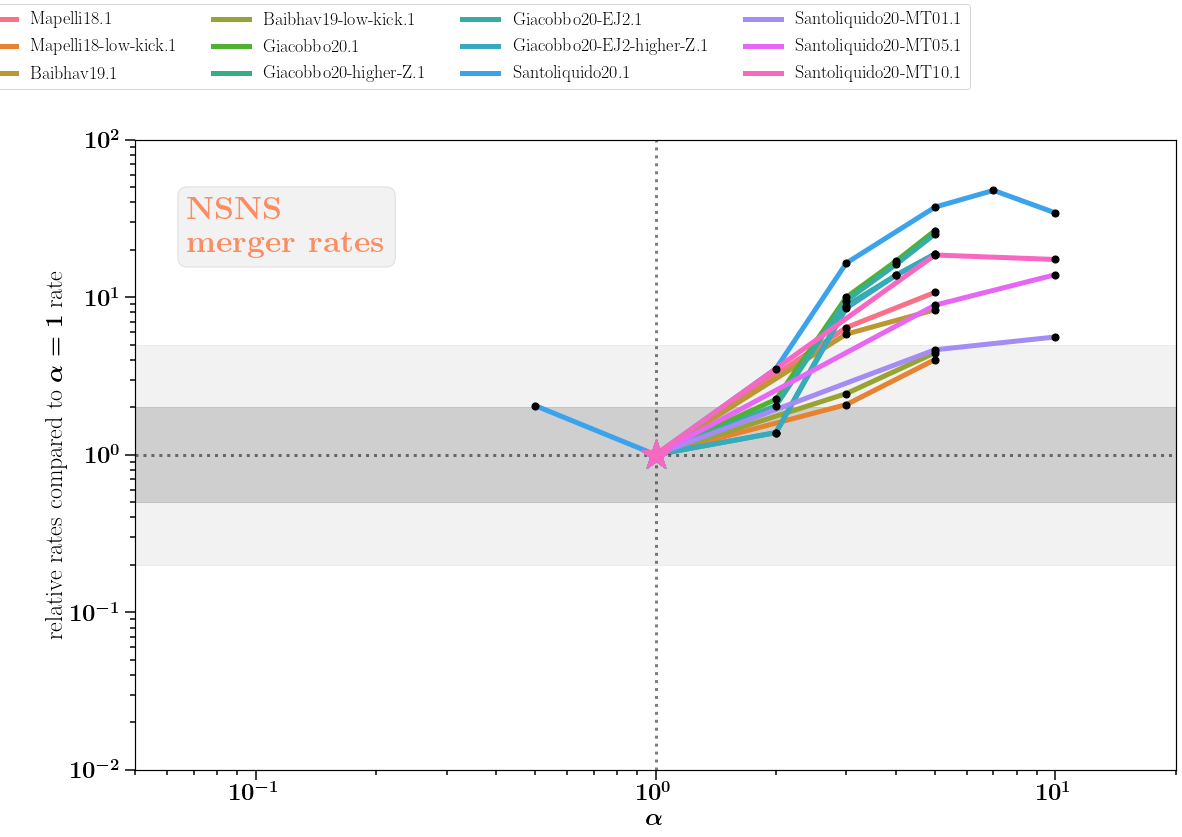

In [367]:


# def make_up_axes(axe=None, DCOtype='BHNS', df='None'):

        
#     # axes layout and mark up 
#     axe.set_yscale('log')
#     axe.set_xscale('log')
#     ylabel = r'relative rates compared to $\alpha = 1$ rate'
#     xlabel = r'$\alpha$'
#     axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs, setMinor=False)
#     bps_names = []

#     axe.set_ylim(0.01, 100)
#     axe.set_xlim(0.05, 20)
    
#     axe.plot([0.05,50], [1,1],  c='k', linestyle=':', lw=3., alpha=0.5)   
#     axe.plot([1,1], [0.01, 100],  c='k', linestyle=':', lw=3., alpha=0.5)  
#     axe.fill_between(x=[0.05,50], y1=[0.5, 0.5], y2=[2,2],  alpha=0.3, color='gray', zorder=0)
#     axe.fill_between(x=[0.05,50], y1=[0.2, 0.2], y2=[5,5],  alpha=0.1, color='gray', zorder=0)

    
    
#     return 



DCOtype='NSNS'
    
names =   ['../Data/'+DCOtype+'_intrinsic_isolated-trends-alpha.csv' ]
rate_labels = ['isolated binaries']


df_name = names[0]


df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])
# column_names = df_col.columns
# print(column_names)


df_alpha = df.iloc[:,2::2]
df_rates = df.iloc[:,1::2]

rates_columns = df_rates.columns


ncols, nrows=1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(16,10), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":[1]}) 


colors = sns.color_palette("husl", len(df_alpha.columns))

for ind_n, name in enumerate(df_alpha.columns):
    values = df_alpha[name]
    rates  = df_rates[rates_columns[ind_n]]
#     print(values)

    mask_notna = (df_alpha[name].notna())
    alphas = values[mask_notna]    
    rates = rates[mask_notna]
    
    # in order of alphas 
    sort_index = np.argsort(alphas)
    ordered_alphas = alphas[sort_index]
    ordered_rates  =  rates[sort_index]

    
    if len(values)>0:
        
        axe.scatter(alphas[0],  rates[0]/rates[0], s=1005, c=[colors[ind_n]], zorder=10, marker='*')
        axe.plot(ordered_alphas, ordered_rates/rates[0], c=colors[ind_n], lw=5, zorder=1, label=name)
        axe.scatter(ordered_alphas, ordered_rates/rates[0], c='k', s=50, zorder=2)

text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
axe.text(0.05, 0.91, s=text_DCO, rotation = 0, fontsize = fs+8, color =DCOtypeColorsDict[DCOtype], ha = 'left', va='top',\
         transform=axe.transAxes, weight = 'bold', bbox=textbox_props)


make_up_axes(axe=axe, DCOtype='BHBH', df='None')

lgd = f.legend(fontsize=fs-6, ncol=4,\
                     bbox_to_anchor=(.85, 1.17)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
plt.savefig('./Rates_' +DCOtype + '_alpha.png', dpi=300, transparent=False)#,\
plt.savefig('./Rates_' +DCOtype + '_alpha.pdf',  bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

plt.close()          



In [146]:




def plotDCOrates(axe=None, df_name=None, DCOtype='BHNS'):
    

    
    ############## 2nd panel on the right ##########################
    ################################################################
    
#     nComparisons = 14
#     xx = np.asarray(range(nComparisons)) -1 
#     xmin, xmax = np.min(xx), np.max(xx) 
    
    
    # Number of studies we have available to compare with; 
    Ncompare = 12

    
    print(df_name)

    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])


    df = df.iloc[:,1::2]
    for ind_n, name in enumerate(df.columns):
        print(name)
        rate = df[name]
        mask_notna = (df[name].notna())
        rate = rate[mask_notna]
        colors = sns.color_palette("husl", len(rate))
        axe.scatter(rate,  ind_n*np.ones_like(rate), s=105, c='gray', zorder=10)
        

        
        axe.errorbar(x=[np.min(rate),np.max(rate)], y=2*[ind_n], yerr=2*[0.5], color='k', zorder=5)

        

    ylim = len(df.columns)      


    return df



def make_up_axes(axe=None, DCOtype='BHNS', df='None'):

        
    # axes layout and mark up 
    axe.set_xscale('log')
    xlabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'$- $', fontsize=fs, setMinor=False)
    bps_names = []
    for ind_m, bps_model in enumerate(df.columns):
        bps_names.append(r'\textbf{%s}'%(bps_model) )
    axe.set_yticks(range(len(df.columns)))
    axe.set_yticklabels(bps_names, rotation=0, fontsize=18)

    axe.set_xlim(1E-3, 1E4)
    
    
    
    DCOtypeIndexDict = {'BHBH':0, 'BHNS':1, 'NSNS':2}
    ind_t=DCOtypeIndexDict[DCOtype]
    
    xx = np.linspace(-100, 100, 100)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
    if DCOtype in ['BHBH','NSNS', 'BHNS']:
        axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=2)


    elif DCOtype =='BHBH':
        # for BHBH rates also plot intrinsic z=0 estimated rates based on a redshift model
        min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
        max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
        axe.fill_betweenx(y=xx, x1=min_obs_rate2, x2=max_obs_rate2,  alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=0)
        axe.plot(min_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)
        axe.plot(max_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)

    # for BHNS plot that its a upper limit
    if DCOtype=='BHNS':
        axe.scatter(max_obs_rate, xx, marker=8, color=DCOtypeColorsDict[DCOtype], zorder=0, s=120)    

    
    axe.set_ylim(-1,len(df.columns))
    
    

    
    
    ################################################################
    ################################################################
    ################################################################
    
    
    return 
    
    





def make_figure(DCOtype='BHNS'):
    
    
    ncols=1
    if DCOtype in ['BHBH']:
        names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv' ]
        rate_labels = ['isolated binaries']
        
        nrows=1
        f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,25), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":height})        

    
    for ind_n, csv_filename in enumerate(names):
        df = plotDCOrates_relative_variations(axe[ind_n], csv_filename, DCOtype)
        
        
        make_up_axes(axe[ind_n], DCOtype, df) 
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '_new.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '_new.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()    
    
    
    
    
    

In [ ]:
DCOtype='BHBH'
    
names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv' ]
rate_labels = ['isolated binaries']

############## 2nd panel on the right ##########################
################################################################

#     nComparisons = 14
#     xx = np.asarray(range(nComparisons)) -1 
#     xmin, xmax = np.min(xx), np.max(xx) 




df_name = names[0]
print(df_name)




df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13,14])
df.columns = df.columns.astype(str)
df = df.iloc[:,2::2]
print(df.columns)

print(df)



df = pd.read_csv(df_name, header=5, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])


df = df.iloc[:,1::2]

print(df.columns)



In [189]:
DCOtype='BHBH'
    
names =   ['../Data/'+DCOtype+'_intrinsic_isolated-binary-evolution.csv' ]
rate_labels = ['isolated binaries']

############## 2nd panel on the right ##########################
################################################################

#     nComparisons = 14
#     xx = np.asarray(range(nComparisons)) -1 
#     xmin, xmax = np.min(xx), np.max(xx) 


# Number of studies we have available to compare with; 
Ncompare = 12

df_name = names[0]
print(df_name)




df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13,14])
df.columns = df.columns.astype(str)
df = df.iloc[:,2::2]
print(df.columns)
df.astype(str)


# print(df)

for ind_n, name in enumerate(df.columns):
    rate = df[name]
    print(rate[0])
    print(df[name])
    df[name] = df[name].apply(eval)
    
    rate = df[name]
    print(rate[0])
    mask_notna = (df[name].notna())
    var_labels = rate[mask_notna]
    print(name)
    
    
    
    if len(var_labels)>0:
        unique_variations = []
        for ind_m, model in enumerate(var_labels):
            print(var_labels[ind_m])
            
            unique_variations = np.unique(np.concatenate((unique_variations, var_labels[ind_m])))

    
# for ind_n, name in enumerate(df.columns):
#     rate = df[name]
#     mask_notna = (df[name].notna())
#     var_labels = rate[mask_notna]
#     print(name)
#     # if we have available variation labels 
#     if len(var_labels)>0:
#         unique_variations = []
#         for ind_m, model in enumerate(var_labels):
#             print(type(var_labels[ind_m]))

#             unique_variations = np.unique(np.concatenate((unique_variations, var_labels[ind_m])))
            
        
#         print(unique_variations)
# #         print(name, var_labels)


../Data/BHBH_intrinsic_isolated-binary-evolution.csv
Index(['Dominik15.1', 'deMink15.1', 'Lamberts16.1', 'Mapelli18.1',
       'Giacobbo18.1', 'Kruckow18.1', 'Eldridge19.1', 'Artale19.1', 'Boco19.1',
       'Baibhav19.1', 'Neijssel19(A).1', 'Neijssel19(B).1', 'Giacobbo20.1',
       'Belczynski20(A).1', 'Belczynski20(B).1', 'Santoliquido20.1',
       'Tang20.1', 'Roman-Garza20.1', 'Bavera21.1'],
      dtype='object')
["0","-1"]
0     ["0","-1"]
1     ["1","-2"]
2     ["1","-1"]
3     ["3","-2"]
4     ["3","-1"]
         ...    
87           NaN
88           NaN
89           NaN
90           NaN
91           NaN
Name: Dominik15.1, Length: 92, dtype: object


TypeError: eval() arg 1 must be a string, bytes or code object

In [148]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [ ]:
_isolated-trends